# Table of Contents
### 01. Import Libraries and Dataframe
### 02. Data Cleaning
### 03. Data Prep for Regression Analysis
### 04. Regression Analysis

# 01. Import Libraries and Dataframe

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# path= project pathname
path=r'/Users/alexmendrin/Documents/Career Foundry/Data Immersion/Achievement 6/Project Folder'

In [4]:
# import dataframe
vc= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'vehicle_collisions_cleaned.pkl'))

# 02. Data Cleaning

In [5]:
vc.columns

Index(['date', 'time', 'borough', 'latitude', 'longitude', 'location',
       'num_persons_injured', 'num_persons_killed', 'num_pedestrians_injured',
       'num_pedestrians_killed', 'num_cyclist_injured', 'num_cyclist_killed',
       'num_motorist_injured', 'num_motorist_killed', 'collision_id',
       'contrib_factor_vehicle_1', 'contrib_factor_vehicle_2',
       'vehicle_type_1', 'vehicle_type_2'],
      dtype='object')

In [6]:
vc.head(20)

,date,time,borough,latitude,longitude,location,num_persons_injured,num_persons_killed,num_pedestrians_injured,num_pedestrians_killed,num_cyclist_injured,num_cyclist_killed,num_motorist_injured,num_motorist_killed,collision_id,contrib_factor_vehicle_1,contrib_factor_vehicle_2,vehicle_type_1,vehicle_type_2
0,9/11/21,9:35,BROOKLYN,40.67,-73.87,"(40.667202, -73.8665)",0,0,0,0,0,0,0,0,4456314,7.0,7.0,2.0,9.0
1,12/14/21,8:13,BROOKLYN,40.68,-73.92,"(40.683304, -73.917274)",0,0,0,0,0,0,0,0,4486609,7.0,7.0,9.0,9.0
2,12/14/21,17:05,NaN,40.71,-73.96,"(40.709183, -73.956825)",0,0,0,0,0,0,0,0,4486555,2.0,7.0,3.0,6.0
3,12/14/21,8:17,BRONX,40.87,-73.83,"(40.86816, -73.83148)",2,0,0,0,0,0,2,0,4486660,7.0,7.0,3.0,3.0
4,12/14/21,21:10,BROOKLYN,40.67,-73.90,"(40.67172, -73.8971)",0,0,0,0,0,0,0,0,4487074,2.0,7.0,3.0,9.0
5,12/14/21,14:58,MANHATTAN,40.75,-73.97,"(40.75144, -73.97397)",0,0,0,0,0,0,0,0,4486519,2.0,7.0,3.0,3.0
6,12/13/21,0:34,NaN,40.70,-73.89,"(40.701275, -73.88887)",0,0,0,0,0,0,0,0,4486934,2.0,7.0,3.0,9.0
7,12/14/21,16:50,QUEENS,40.68,-73.76,"(40.675884, -73.75577)",0,0,0,0,0,0,0,0,4487127,2.0,7.0,3.0,3.0
8,12/14/21,0:59,NaN,40.60,-74.00,"(40.59662, -74.00231)",0,0,0,0,0,0,0,0,4486564,2.0,7.0,3.0,9.0
9,12/14/21,23:10,QUEENS,40.67,-73.79,"(40.66684, -73.78941)",2,0,0,0,0,0,2,0,4486635,4.0,7.0,3.0,3.0


In [7]:
vc.shape

(927852, 19)

#### Missing Values

In [9]:
# check for missing values
vc.isnull().sum()
# no missing values that we need to handle

date                             0
time                             0
borough                     305443
latitude                         0
longitude                        0
location                         0
num_persons_injured              0
num_persons_killed               0
num_pedestrians_injured          0
num_pedestrians_killed           0
num_cyclist_injured              0
num_cyclist_killed               0
num_motorist_injured             0
num_motorist_killed              0
collision_id                     0
contrib_factor_vehicle_1         0
contrib_factor_vehicle_2         0
vehicle_type_1                   0
vehicle_type_2                   0
dtype: int64

#### Duplicates Check

In [11]:
dups= vc.duplicated()
dups.shape
# No Duplicates

(927852,)

#### Extreme Values Check

/Users/alexmendrin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='contrib_factor_vehicle_1', ylabel='Density'>

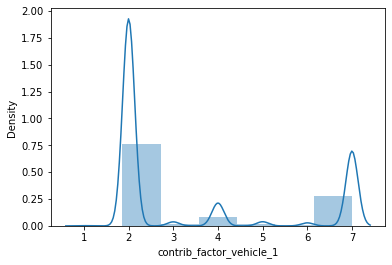

In [14]:
sns.distplot(vc['contrib_factor_vehicle_1'], bins=7)
# There are no extreme values because the values are not continuous

/Users/alexmendrin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='vehicle_type_1', ylabel='Density'>

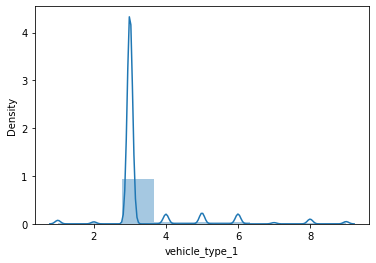

In [15]:
sns.distplot(vc['vehicle_type_1'], bins=9)
# There are no extreme values because the values are not continuous

# 03. Data Prep for Regression Analysis

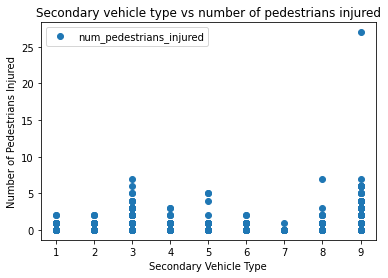

In [16]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

vc.plot(x = 'vehicle_type_2', y='num_pedestrians_injured',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Secondary vehicle type vs number of pedestrians injured')  
plt.xlabel('Secondary Vehicle Type')  
plt.ylabel('Number of Pedestrians Injured')  
plt.show()

#### Hypothesis: An accident where a larger number of pedestrians are injured involve a 3 or 9 secondary vehicle type.

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects

X= vc['vehicle_type_2'].values.reshape(-1,1)
y= vc['num_pedestrians_injured'].values.reshape(-1,1)

In [19]:
X

array([[9.],
       [9.],
       [6.],
       ...,
       [3.],
       [3.],
       [3.]])

In [20]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [21]:
# Split data into a training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 04. Regression Analysis

In [22]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [23]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict the values of y using X

y_predicted= regression.predict(X_test)

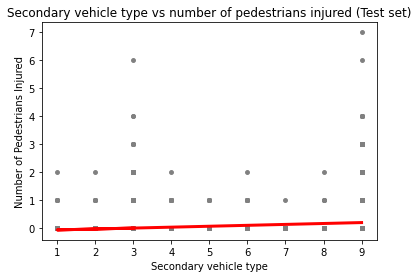

In [25]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Secondary vehicle type vs number of pedestrians injured (Test set)')
plot_test.xlabel('Secondary vehicle type')
plot_test.ylabel('Number of Pedestrians Injured')
plot_test.show()

#### There are consistently 0 pedestrians injured in a vehicular accident no matter what the secondary vehicle type is.

In [26]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [27]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.032813]]
Mean squared error:  0.050780566315622236
R2 score:  0.1311829540602064



>#### Slope is .03, indicating that it is a near horizontal line, which goes with the fact that all vehicle types are represented equally with how many pedestrians are typically injured in an accident
>#### MSE: 0.05, This indicates that the regression line lies very close to the data points, which would indicate a good fit, however...
>#### R2 score: 0.13, The R2 is very close to 0, indicating that there is alot of variance in the data and it is not a good fit

#### Overall, the regression line does not fit the dataframe very well, which could be because the vehicle type values are more catagorical, and because there is not a defined trend amongst the data points.
#### This is a large dataset so there are plenty of data points to work with and the only extreme value is in vehicle type 9, where there are over 25 people who were injured in one incident.

In [28]:
y_predicted

array([[ 0.19650928],
       [-0.0003687 ],
       [-0.0003687 ],
       ...,
       [ 0.09807029],
       [ 0.19650928],
       [-0.0003687 ]])

In [32]:
# Create a dataframe comparing the actual and predicted values of y.

data = vc.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

AttributeError: 'DataFrame' object has no attribute 'DataFrame'

#### I keep getting this error when I try to compare the test and train y-values, and I'm not sure how to go about fixing it.

#### Compare how the regression fits the training set

In [33]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [34]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [35]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.032813]]
Mean squared error:  0.05208978707104379
R2 score:  0.12600102637954946


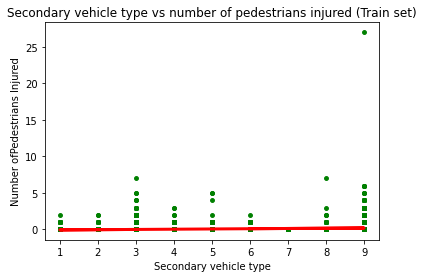

In [36]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Secondary vehicle type vs number of pedestrians injured (Train set)')
plot_test.xlabel('Secondary vehicle type')
plot_test.ylabel('Number ofPedestrians Injured')
plot_test.show()